### Investors: Profitable Insights for E-waste Recycling Companies
This notebook aims to identify profitable insights for e-waste recycling companies by analyzing the `boavizta-data-us` dataset. The focus will be on correlations that highlight opportunities for investment in sustainable hardware lifecycle management.

### Project Libraries

In [189]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import scikit_posthocs as sp


### Reading the data

In [190]:
df = pd.read_csv(r"../data/boavizta-data-us.csv")

### Showcasing some useful information for better understanding of the data

In [191]:
df.shape

(1226, 32)

In [192]:
df.head()

,manufacturer,name,category,subcategory,gwp_total,gwp_use_ratio,yearly_tec,lifetime,use_location,report_date,...,added_date,add_method,gwp_transport_ratio,gwp_eol_ratio,gwp_electronics_ratio,gwp_battery_ratio,gwp_hdd_ratio,gwp_ssd_ratio,gwp_othercomponents_ratio,comment
0,Apple,13-inch MacBook Air (M1 CPU) 256GB - 2020,Workplace,Laptop,161.0,0.15,NaN,3.0,WW,November 2020,...,27-05-2022,Manual,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apple,13-inch MacBook Air (M1 CPU) 512GB - 2020,Workplace,Laptop,181.0,0.15,NaN,3.0,WW,November 2020,...,27-05-2022,Manual,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apple,13-inch MacBook Air with Retina display (1.1GH...,Workplace,Laptop,174.0,0.15,NaN,3.0,WW,March 2020,...,01-11-2020,Initial Parsing,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple,13-inch MacBook Air with Retina display (1.1GH...,Workplace,Laptop,202.0,0.15,NaN,3.0,WW,March 2020,...,01-11-2020,Initial Parsing,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Apple,13-inch MacBook Pro (1.4GHz quad-core CPU) 256...,Workplace,Laptop,217.0,0.17,NaN,3.0,WW,May 2020,...,01-11-2020,Initial Parsing,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
df_nan = df["gwp_eol_ratio"].isna().sum()
df_nan

np.int64(782)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   manufacturer               1226 non-null   object 
 1   name                       1226 non-null   object 
 2   category                   1226 non-null   object 
 3   subcategory                1226 non-null   object 
 4   gwp_total                  1226 non-null   float64
 5   gwp_use_ratio              1151 non-null   float64
 6   yearly_tec                 734 non-null    float64
 7   lifetime                   1193 non-null   float64
 8   use_location               1113 non-null   object 
 9   report_date                1211 non-null   object 
 10  sources                    1226 non-null   object 
 11  sources_hash               1226 non-null   object 
 12  gwp_error_ratio            1022 non-null   float64
 13  gwp_manufacturing_ratio    757 non-null    float

In [195]:
df.columns

Index(['manufacturer', 'name', 'category', 'subcategory', 'gwp_total',
       'gwp_use_ratio', 'yearly_tec', 'lifetime', 'use_location',
       'report_date', 'sources', 'sources_hash', 'gwp_error_ratio',
       'gwp_manufacturing_ratio', 'weight', 'assembly_location', 'screen_size',
       'server_type', 'hard_drive', 'memory', 'number_cpu', 'height',
       'added_date', 'add_method', 'gwp_transport_ratio', 'gwp_eol_ratio',
       'gwp_electronics_ratio', 'gwp_battery_ratio', 'gwp_hdd_ratio',
       'gwp_ssd_ratio', 'gwp_othercomponents_ratio', 'comment'],
      dtype='object')

### Cleaning the data
1. Dropping some columns that will not be used for the analysis

In [196]:
df.isnull().sum()

manufacturer                    0
name                            0
category                        0
subcategory                     0
gwp_total                       0
gwp_use_ratio                  75
yearly_tec                    492
lifetime                       33
use_location                  113
report_date                    15
sources                         0
sources_hash                    0
gwp_error_ratio               204
gwp_manufacturing_ratio       469
weight                        191
assembly_location             209
screen_size                   353
server_type                  1162
hard_drive                   1073
memory                       1165
number_cpu                   1173
height                       1226
added_date                      0
add_method                      0
gwp_transport_ratio           739
gwp_eol_ratio                 782
gwp_electronics_ratio        1216
gwp_battery_ratio            1226
gwp_hdd_ratio                1226
gwp_ssd_ratio 

In [197]:
df.drop(columns = [
    'sources', 'server_type', 'hard_drive', 'memory', 'number_cpu', 'height', 
    'added_date', 'add_method', 'comment', 'sources_hash', 'report_date',
    'screen_size', 'use_location'
], inplace=True)

In [198]:
df.columns

Index(['manufacturer', 'name', 'category', 'subcategory', 'gwp_total',
       'gwp_use_ratio', 'yearly_tec', 'lifetime', 'gwp_error_ratio',
       'gwp_manufacturing_ratio', 'weight', 'assembly_location',
       'gwp_transport_ratio', 'gwp_eol_ratio', 'gwp_electronics_ratio',
       'gwp_battery_ratio', 'gwp_hdd_ratio', 'gwp_ssd_ratio',
       'gwp_othercomponents_ratio'],
      dtype='object')

### Correlation Analysis for Investors
- This section focuses on identifying correlations that can reveal profitable insights for e-waste recycling companies. We will look for relationships between hardware characteristics and environmental impact metrics that suggest opportunities for improved recycling, material recovery, or extended product lifecycles.

In [199]:
def evaluating_strength(correlation_coefficient):
    abs_r = abs(correlation_coefficient)
    if correlation_coefficient == 0:
        return "No correlation"
    elif 0 < abs_r < 0.3:
        return "Weak correlation (linear relationship is very weak or negligible)"
    elif 0.3 <= abs_r < 0.5:
        return "Moderate correlation"
    elif 0.5 <= abs_r < 0.7:
        return "Strong correlation"
    elif 0.7 <= abs_r < 1:
        return "Very strong correlation"
    elif abs_r == 1:
        return "Perfect correlation"
    else:
        return "Invalid value for r"

| Hypothesis                                                                | Variables(s) Involved               | Variable(s) Type(s)         | Test(s)                  |
|---------------------------------------------------------------------------|-------------------------------------|------------------------|-------------------------|
| (H1) Higher `gwp_total` correlates with higher `weight` | `gwp_total`, `weight` | Continuous/ Continuous |Pearson correlation test |

- **Insight for Investors:** Devices with higher total environmental impact and greater weight might indicate significant material recovery opportunities. Investing in advanced recycling technologies for such devices could yield higher returns due to the larger volume of recoverable materials.

##### Creating a new variable based on gwp_total and removing outliers

In [200]:
df.shape

(1226, 19)

In [201]:
print(df["gwp_total"].mean())
print(df["gwp_total"].quantile(0.25))
print(df["gwp_total"].quantile(0.75))
print(df["gwp_total"].quantile(0.05))
print(df["gwp_total"].quantile(0.95))
print(df["gwp_total"].info())


1043.8162243066886
259.0
536.5
70.0
5335.0
<class 'pandas.core.series.Series'>
RangeIndex: 1226 entries, 0 to 1225
Series name: gwp_total
Non-Null Count  Dtype  
--------------  -----  
1226 non-null   float64
dtypes: float64(1)
memory usage: 9.7 KB
None


In [202]:
def define_emissions(row):
    if row["gwp_total"] > 5335:
        return "High Emissions"
    elif row["gwp_total"] >= 259 and row["gwp_total"] <= 536.5:
        return "Moderate Emissions"
    else:
        return "Low Emissions"
    
df["Emissions_Label"] = df.apply(define_emissions, axis=1)
print("\nValue counts for Emissions_Label:")
print(df["Emissions_Label"].value_counts())

# Target variable for classification (1 for Dry, 0 for Not Dry)
y = (df["subcategory"] == "Emissions_Label").astype(int)
# Features for classification (excluding the target variable)

# Features (excluding original Weather Type and the new Dryness_Label_Wildfire)
x = df.drop(["subcategory", "Emissions_Label"], axis=1)

numerical_features = x.select_dtypes(include=np.number).columns

# Outlier Handling (Capping using IQR method)
# This approach helps to mitigate the impact of extreme values without removing data points,
# which is often preferred in environmental data where outliers might represent real, albeit rare, events.
for col in numerical_features:
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(f"Outliers in {col} handled by capping.")


Value counts for Emissions_Label:
Emissions_Label
Moderate Emissions    615
Low Emissions         549
High Emissions         62
Name: count, dtype: int64
Outliers in gwp_total handled by capping.
Outliers in gwp_use_ratio handled by capping.
Outliers in yearly_tec handled by capping.
Outliers in lifetime handled by capping.
Outliers in gwp_error_ratio handled by capping.
Outliers in gwp_manufacturing_ratio handled by capping.
Outliers in weight handled by capping.
Outliers in gwp_transport_ratio handled by capping.
Outliers in gwp_eol_ratio handled by capping.
Outliers in gwp_electronics_ratio handled by capping.
Outliers in gwp_battery_ratio handled by capping.
Outliers in gwp_hdd_ratio handled by capping.
Outliers in gwp_ssd_ratio handled by capping.
Outliers in gwp_othercomponents_ratio handled by capping.


In [203]:
# Fill missing values with subcategory averages, then category averages, then drop remaining NaNs
df['gwp_total'] = df['gwp_total'].fillna(df.groupby('subcategory')['gwp_total'].transform('mean'))
df['weight'] = df['weight'].fillna(df.groupby('subcategory')['weight'].transform('mean'))
df['gwp_total'] = df['gwp_total'].fillna(df.groupby('category')['gwp_total'].transform('mean'))
df['weight'] = df['weight'].fillna(df.groupby('category')['weight'].transform('mean'))
df_clean_h1 = df[['gwp_total', 'weight']].dropna()

pearson_corr_h1, pearson_p_h1 = stats.pearsonr(df_clean_h1['gwp_total'], df_clean_h1['weight'])
print(f'Pearson correlation (gwp_total vs weight): {pearson_corr_h1:.3f} (p={pearson_p_h1:.3f})')
print(f'Strength: {evaluating_strength(pearson_corr_h1)}')

Pearson correlation (gwp_total vs weight): 0.651 (p=0.000)
Strength: Strong correlation


In [204]:
df_clean_h1.shape

(1226, 2)

#### Pearson interpretation and analysis: Correlating device weights with Total GHG emissions
- Pearson R = 0.651
    - Indicates a relevant positive linear correlation: as device weight increases, the total GHG emissions slightly increase, but the relationship is not strong.

#### Plot: `gwp_total` vs `weight`

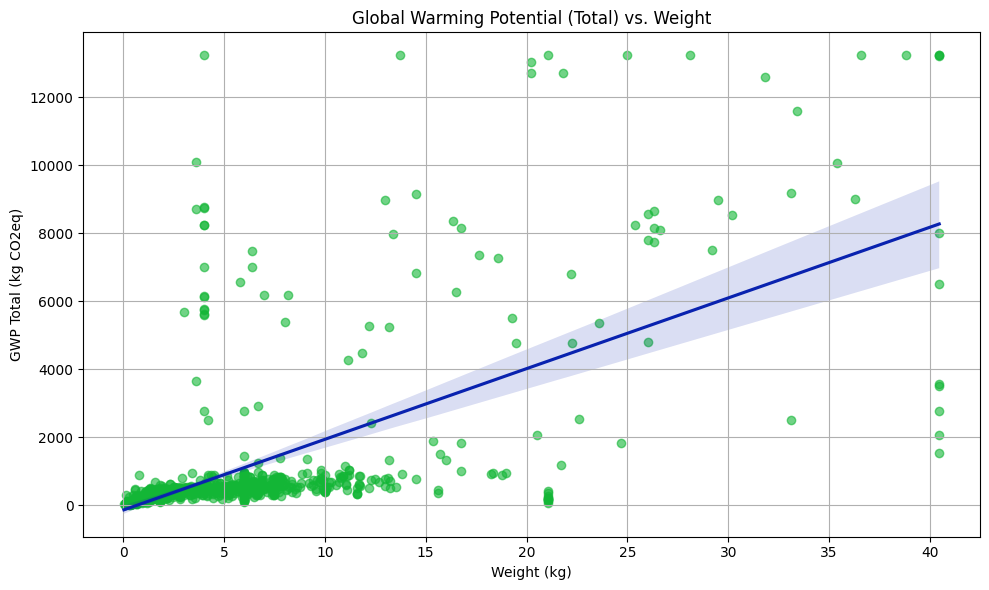

In [205]:
plt.figure(figsize=(10, 6))
sns.regplot(x='weight', y='gwp_total', data=df_clean_h1,
            line_kws={'color': '#0922AF'},
            scatter_kws={'alpha': 0.6, 'color': '#13b636'})
plt.title('Global Warming Potential (Total) vs. Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('GWP Total (kg CO2eq)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Conclusion (H1): Correlating between device weights and Total GHG emissions
- Even though the Pearson R value indicates a positive linear correlation, the data points are highly spread, far from the regression line, as you can see in the graph below. 

| Hypothesis                                                                                 | Variable(s) Involved                      | Variable(s) Type(s)     | Test(s)                                                                                  |
|--------------------------------------------------------------------------------------------|-------------------------------------------|--------------------------|------------------------------------------------------------------------------------------|
| (H2) Assembly location is associated with transportation-related GHG emissions            | `assembly_location_clean`, `gwp_transport_ratio` | Categorical / Continuous | Kruskal-Wallis H-test (non-parametric; suitable for comparing >2 groups with non-normal data) |


- **Insight for Investors:** 

There are statistically significant differences in transportation-related GHG emissions (gwp_transport_ratio) based on the product’s assembly location.

In [206]:
df["assembly_location"].value_counts()

assembly_location
CN         467
China      362
EU         153
Asia        24
KR           7
default      2
WW           2
Name: count, dtype: int64

In [207]:
# Standardize assembly_location values
df['assembly_location_clean'] = df['assembly_location'].replace({
    'CN': 'China',
    'KR': 'South Korea',
    'EU': 'Europe',
    'default': 'Unknown',
    'WW': 'Unknown',
})

# Optional: verify the transformation
print(df['assembly_location_clean'].value_counts())
print("Null values on assembly_location:",df['assembly_location_clean'].isnull().sum())

assembly_location_clean
China          829
Europe         153
Asia            24
South Korea      7
Unknown          4
Name: count, dtype: int64
Null values on assembly_location: 209


In [208]:
# Fill missing values in 'assembly_location_clean' with the most frequent location
df['assembly_location_clean'] = df['assembly_location_clean'].fillna('China')

# Optional: confirm fill
print(df['assembly_location_clean'].value_counts(dropna=False))

assembly_location_clean
China          1038
Europe          153
Asia             24
South Korea       7
Unknown           4
Name: count, dtype: int64


In [209]:
# Fill missing values for gwp_transport_ratio
df['gwp_transport_ratio'] = df['gwp_transport_ratio'].fillna(df.groupby('subcategory')['gwp_transport_ratio'].transform('mean'))
df['gwp_transport_ratio'] = df['gwp_transport_ratio'].fillna(df.groupby('category')['gwp_transport_ratio'].transform('mean'))
df["gwp_transport_ratio"].isnull().sum()

np.int64(0)

In [210]:
from scipy.stats import kruskal
import scikit_posthocs as sp

# Ensure no nulls
df_clean = df[['assembly_location_clean', 'gwp_transport_ratio']].dropna()

# Group data
grouped = [group['gwp_transport_ratio'].values for name, group in df_clean.groupby('assembly_location_clean')]

# Kruskal-Wallis test
stat, p = kruskal(*grouped)
print(f"Kruskal-Wallis H statistic: {stat:.4f}, p-value: {p:.6f}")

# Post-hoc Dunn's test with Bonferroni correction
dunn_results = sp.posthoc_dunn(df_clean, val_col='gwp_transport_ratio', group_col='assembly_location_clean', p_adjust='bonferroni')
print(dunn_results)


Kruskal-Wallis H statistic: 35.1414, p-value: 0.000000
                 Asia     China    Europe  South Korea   Unknown
Asia         1.000000  0.036711  0.017523     0.078908  1.000000
China        0.036711  1.000000  1.000000     0.000044  0.369041
Europe       0.017523  1.000000  1.000000     0.000022  0.253368
South Korea  0.078908  0.000044  0.000022     1.000000  1.000000
Unknown      1.000000  0.369041  0.253368     1.000000  1.000000


Testing Kruskal-Wallis test Strengh

In [211]:
# Kruskal-Wallis H-test statistic, number of groups, and sample size
H = 35.1414  # Replace this with your actual H-statistic if dynamic
k = df['assembly_location_clean'].nunique()
n = df['assembly_location_clean'].notna().sum()

# Calculate epsilon squared (ε²)
epsilon_squared = (H - k + 1) / (n - k)

# Determine effect size strength
if epsilon_squared < 0.01:
    strength = "Very small or negligible effect"
elif epsilon_squared < 0.06:
    strength = "Small effect"
elif epsilon_squared < 0.14:
    strength = "Medium effect"
else:
    strength = "Large effect"

# Print results
print(f"Kruskal-Wallis statistic effect size (epsilon squared): {epsilon_squared:.4f}")
print(f"Effect size interpretation: {strength}")

Kruskal-Wallis statistic effect size (epsilon squared): 0.0255
Effect size interpretation: Small effect


#### Plot: `Local_assembly` vs `gwp_transport_ratio`

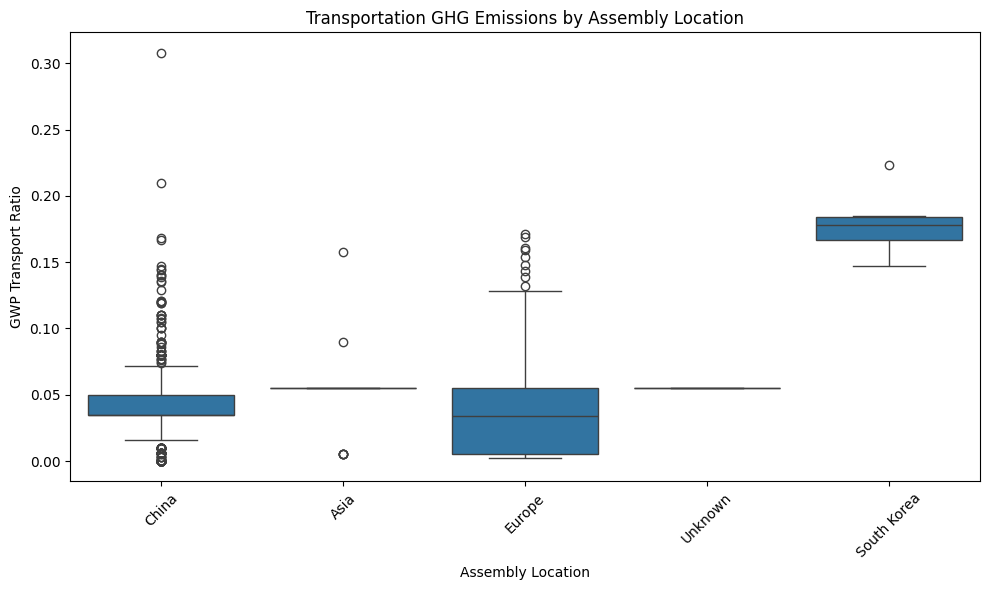

In [212]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='assembly_location_clean', y='gwp_transport_ratio')
plt.title('Transportation GHG Emissions by Assembly Location')
plt.ylabel('GWP Transport Ratio')
plt.xlabel('Assembly Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conclusion(H2): Correlating between gwp_transport_ratio and Local_Assembly
- The Kruskal-Wallis test results confirm statistically significant differences in transportation emissions across assembly locations, with China standing out as the highest emitter and Europe and South Korea showing the lowest values. Investors should consider these findings when evaluating supply chain sustainability, carbon risk exposure, and the potential impact on ESG performance. Focusing investments on companies with localized or regional manufacturing may deliver both environmental and financial advantages in a carbon-constrained market.


| Hypothesis                                                                | Variables(s) Involved               | Variable(s) Type(s)         | Test(s)                  |
|---------------------------------------------------------------------------|-------------------------------------|------------------------|-------------------------|
| (H3) Higher `gwp_eol_ratio` correlates with lower `gwp_total` | `gwp_eol_ratio`, `gwp_total` | Continuous/ Continuous |Pearson correlation test |

- **Insight for Investors:** focusing efforts or capital on reducing EoL (End-of-life (EoL) GHG emissions) may not lead to significant improvements in total product emissions. Instead, investors may want to prioritize phases with greater influence on the total GHG profile—such as manufacturing or transportation—to support greener innovations and maximize ESG impact.

In [213]:
# Filling missing values

df['gwp_eol_ratio'] = df['gwp_eol_ratio'].fillna(df.groupby('subcategory')['gwp_eol_ratio'].transform('mean'))
df['gwp_total'] = df['gwp_total'].fillna(df.groupby('subcategory')['gwp_total'].transform('mean'))
df['gwp_eol_ratio'] = df['gwp_eol_ratio'].fillna(df.groupby('category')['gwp_eol_ratio'].transform('mean'))
df['gwp_total'] = df['gwp_total'].fillna(df.groupby('category')['gwp_total'].transform('mean'))

df_clean_h3 = df[['gwp_eol_ratio', 'gwp_total']].dropna()

pearson_corr_h3, pearson_p_h3 = stats.pearsonr(df_clean_h3['gwp_eol_ratio'], df_clean_h3['gwp_total'])
print(f'Pearson correlation (gwp_eol_ratio vs gwp_total): {pearson_corr_h3:.3f} (p={pearson_p_h3:.3f})')
print(f'Strength: {evaluating_strength(pearson_corr_h3)}')

Pearson correlation (gwp_eol_ratio vs gwp_total): -0.108 (p=0.000)
Strength: Weak correlation (linear relationship is very weak or negligible)


#### Plot: `gwp_eol_ratio` vs `gwp_total`

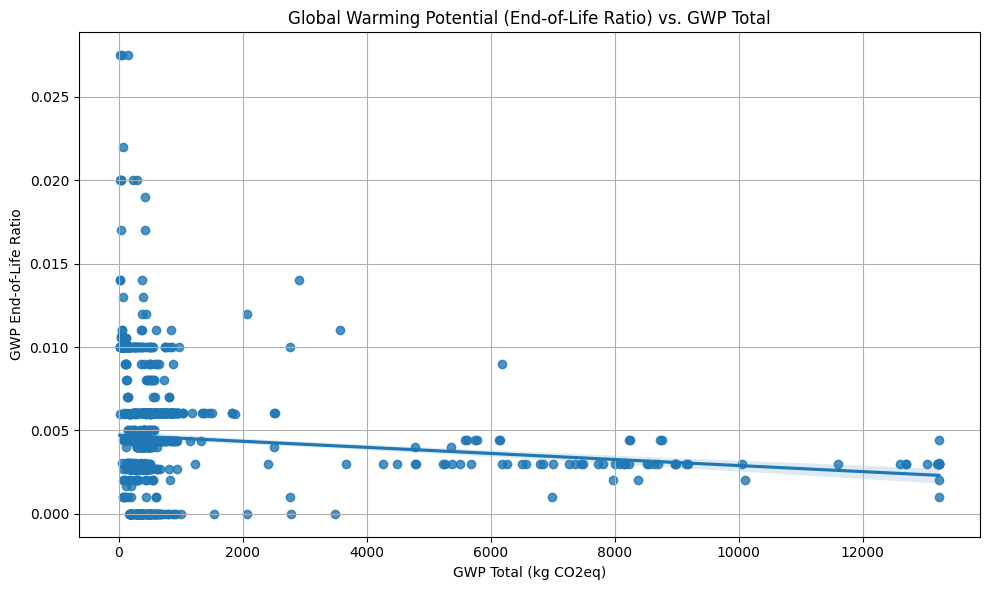

In [214]:
plt.figure(figsize=(10, 6))
sns.regplot(x='gwp_total', y='gwp_eol_ratio', data=df_clean_h3)
plt.title('Global Warming Potential (End-of-Life Ratio) vs. GWP Total')
plt.xlabel('GWP Total (kg CO2eq)')
plt.ylabel('GWP End-of-Life Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Conclusion(H3): End-of-life (EoL) GHG emissions (gwp_eol_ratio) and total GHG emissions (gwp_total)
- Although the correlation is statistically significant (p < 0.05), the relationship between end-of-life emissions and total GHG emissions is very weak and slightly negative (inversily proportional). This suggests that EoL emissions contribute very little to the overall GHG footprint of the devices.
